Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [2]:
NICKNAME = "meedovique"

---

# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [4]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = np.pi**(D / 2) / sp.gamma(1 + D / 2) * R**D
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

Объем сферы размерности 1 радиуса 2 по формуле выше: 4.0
Объем сферы размерности 1 радиуса 2 по известной формуле: 4

Объем сферы размерности 2 радиуса 2 по формуле выше: 12.566370614359172
Объем сферы размерности 2 радиуса 2 по известной формуле: 12.566370614359172

Объем сферы размерности 3 радиуса 2 по формуле выше: 33.51032163829113
Объем сферы размерности 3 радиуса 2 по известной формуле: 33.510321638291124



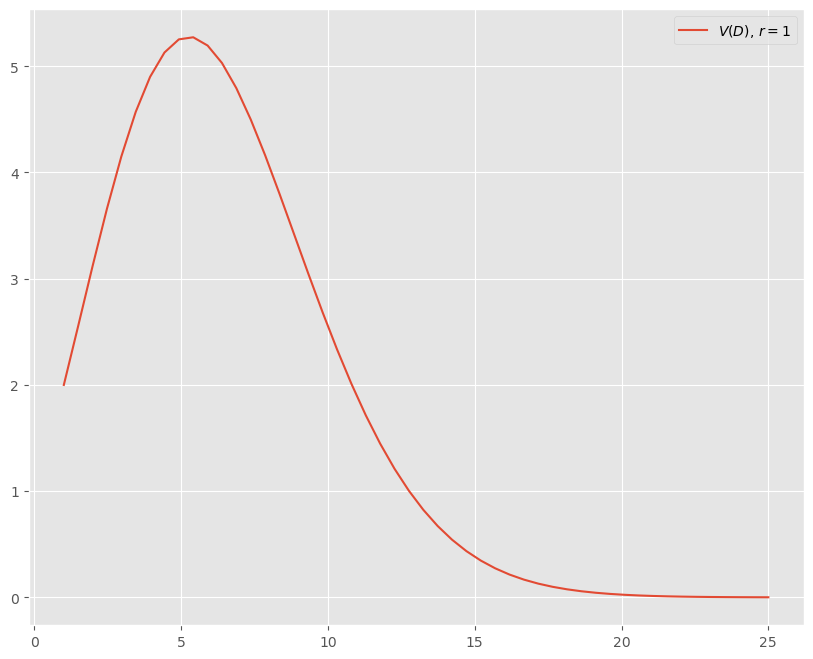

In [5]:
dVolume = {
    1: lambda r: 2 * r,
    2: lambda r: np.pi * r**2,
    3: lambda r: 4 / 3 * np.pi * r**3
}

r = 2
for i in range(1, 4):
    print(f'Объем сферы размерности {i} радиуса {r} по формуле выше: {getSphereVolumeExact(i, r)}')
    print(f'Объем сферы размерности {i} радиуса {r} по известной формуле: {dVolume[i](r)}\n')

D = np.linspace(1, 25)
V = getSphereVolumeExact(D)

plt.figure(figsize = (10, 8))
plt.plot(D, V, label=f'$V(D), \, r = 1$')
plt.grid(True)
plt.legend()
plt.show()

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [38]:
isInside = lambda p, r: np.sum(p ** 2, axis=1) < r ** 2
countInsideNum = lambda points, r: np.count_nonzero(isInside(points, r))

def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """    
    points = np.random.uniform(low=-R, high=R, size=(N, D))
    NInside = countInsideNum(points, R)
    VAll = (2 * R) ** D
    V = (NInside / N) * VAll
    
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

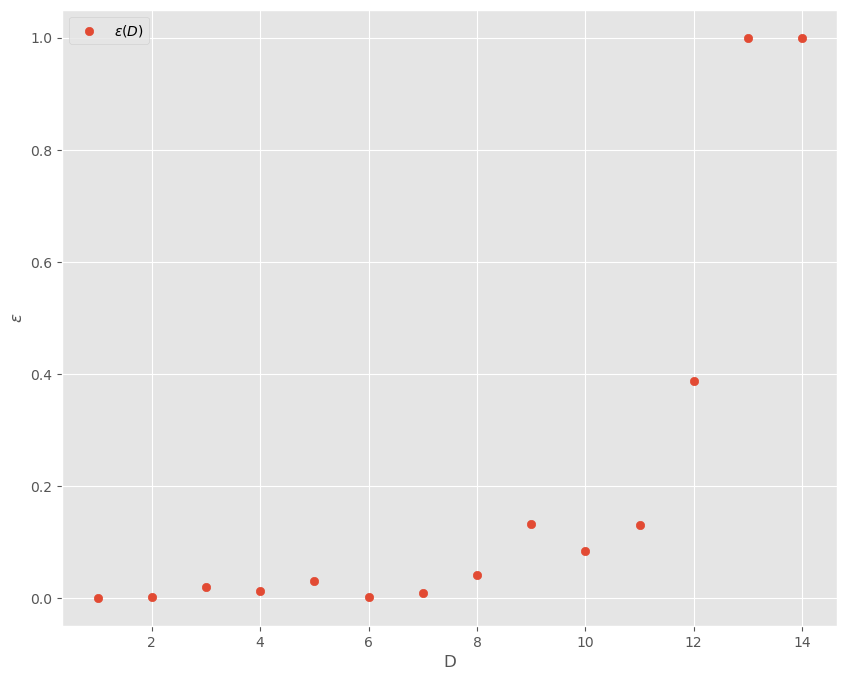

In [39]:
N = 10000
D = np.arange(1, 15)
epsList = []

for d in D:
    eps = abs(getSphereVolumeExact(d) - getSphereVolumePseudorandom(N, d)) / getSphereVolumeExact(d)
    epsList.append(eps)

plt.figure(figsize=(10, 8))
plt.xlabel('D')
plt.ylabel('$\epsilon$')
plt.scatter(D, epsList, label='$\epsilon(D)$')
plt.legend()
plt.show()

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [13]:
#!pip install sobol_seq <-- uncomment to install sobol_seq
import sobol_seq
from scipy.stats.qmc import scale

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [22]:
sobol_seq.i4_sobol_generate?

In [41]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    points = sobol_seq.i4_sobol_generate(D, N)
    NInside = countInsideNum(points, R)
    VAll = (2 * R) ** D
    V = (NInside / N) * VAll
    
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

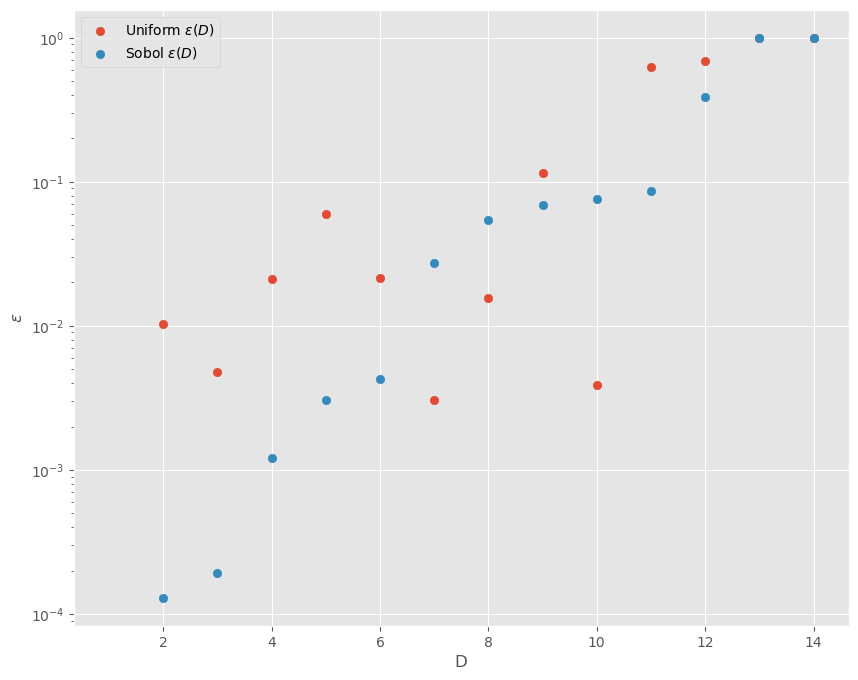

In [43]:
N = 10000
D = np.arange(1, 15)
epsUniformList = []
epsSobolList = []

for d in D:
    VTrue = getSphereVolumeExact(d)
    
    eps = abs(VTrue - getSphereVolumePseudorandom(N, d)) / VTrue
    epsUniformList.append(eps)
    
    eps = abs(VTrue - getSphereVolumeQuasirandom(N, d)) / VTrue
    epsSobolList.append(eps)

plt.figure(figsize=(10, 8))
plt.xlabel('D')
plt.ylabel('$\epsilon$')
plt.yscale('log')
plt.scatter(D, epsUniformList, label='Uniform $\epsilon(D)$')
plt.scatter(D, epsSobolList, label='Sobol $\epsilon(D)$')
plt.legend()
plt.show()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

заметно, что последовательности Соболя дают немного лучше точность, т.к точки расположены плотнее к друг другу, чем случайный набор чисел

# Задание 2

## Задание 2.1
Вычислите значение интеграла 
$$
\int d^d\mathbf{r} \frac{e^{-\mathbf{r}^T\mathbf{r}}}{1 + \mathbf{r}^T\mathbf{r}}, \;\mathbf{r} = (r_1, r_2, ..., r_d)
$$
по всему пространству, используя генерацию случайной величины с гауссовой плотностью.
Проведите результаты для $d=1,2,3,4,5$, используя разумной количество точек.
Для $d=1,2$ сравните с ответом, полученным \textit{любым} другим способом.

In [74]:
from scipy import integrate

func = lambda r: 1 / (1 + np.sum(r**2, axis=1))

n = 10000
mu = 0
sigma = 1 / np.sqrt(2)
fD1 = lambda x: np.e ** (-x**2) / (1 + x**2)
fD2 = lambda x, y: np.e ** (-x**2 - y**2) / (1 + x**2 + y**2)
quad = lambda f: integrate.quad(f, -np.inf, np.inf)[0]
dblquad = lambda f: integrate.dblquad(f, -np.inf, np.inf, -np.inf, np.inf)[0]

for d in range(1,6):
    points = np.random.normal(mu, sigma, size=(N, d))
    i = np.pi**(d / 2) * np.sum(func(points)) / N 
    print(f'normal\td = {d}:\tintegral = {i}')

print(f'quad\td = 1:\tintegral = {quad(fD1)}')
print(f'dblquad\td = 2:\tintegral = {dblquad(fD2)}')

normal	d = 1:	integral = 1.3483128274291394
normal	d = 2:	integral = 1.8749161018588723
normal	d = 3:	integral = 2.7071362954839997
normal	d = 4:	integral = 4.000143204259882
normal	d = 5:	integral = 5.989145670208055
quad	d = 1:	integral = 1.3432934216467354
dblquad	d = 2:	integral = 1.873480492462358


## Задание 2.2
Реализуйте функцию, возвращающую выборку случайной величины с плотностью $\omega(x) \propto \sqrt{1-x^2}, x\in[-1,1]$, используя rejection method.

In [83]:
w = lambda x: np.sqrt(1 - x**2)

def getSample(N):
    """
    Функция возвращает выборку случайных величин с распределнием ~sqrt(1-x^2) 

    --------
    Аргументы:
    N - int, количество случайных точек
    --------
    Функция возвращает:
    sample - numpy ndarray of float, массив случайных величин размера N
    """
    sample = []
    while len(sample) < N:
        x = np.random.uniform(low=-1, high=1)
        y = np.random.uniform(low=0, high=1)
        
        if y < w(x):
            sample.append(x)  
    return sample

Проверьте правильность, сгенерировав достаточно большой sample, и построив гистограмму.

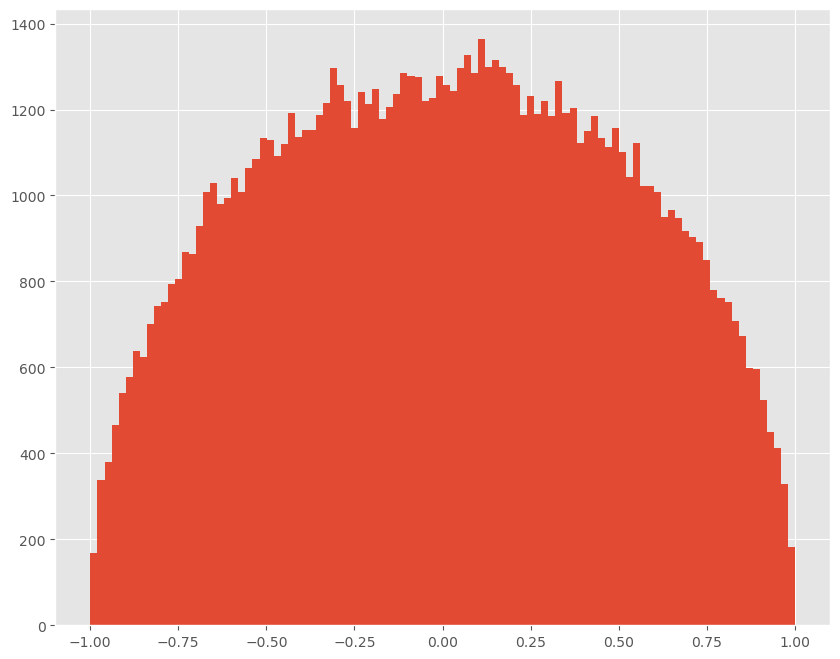

In [90]:
plt.figure(figsize=(10, 8))
plt.hist(getSample(100000), 100)
plt.show()

# Задание 3

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [91]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = np.random.randint(2, size=(N, N))
    state[state == 0] = -1
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [92]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = len(state)
    iBottom = (i - 1) % N
    iTop = (i + 1) % N
    jBottom = (j - 1) % N 
    jTop = (j + 1) % N
    neadrStateSum = state[iTop][j] + state[iBottom][j] + state[i][jTop] + state[i][jBottom]
    E = -state[i][j] * neadrStateSum
    dE = -float(2 * E)
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [93]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = len(state)
    iList = np.random.randint(0, N, N**2)
    jList = np.random.randint(0, N, N**2)
    for t in range(N**2):
        i = iList[t]
        j = jList[t]
        dE = getDeltaE(i, j, state)
        if dE <= 0:
            state[i][j] = -state[i][j]
            continue
        
        w = np.random.uniform(0, 1)
        if w <= np.e**(-dE / T):
            state[i][j] = -state[i][j]
        
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [121]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    E = 0
    N = len(state)
    for i in range(N):
        for j in range(N):
            iBottom = (i - 1) % N
            iTop = (i + 1) % N
            jBottom = (j - 1) % N 
            jTop = (j + 1) % N
            neadrStateSum = state[iTop][j] + state[iBottom][j] + state[i][jTop] + state[i][jBottom]
            E += -state[i][j] * neadrStateSum
            
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [122]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [123]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

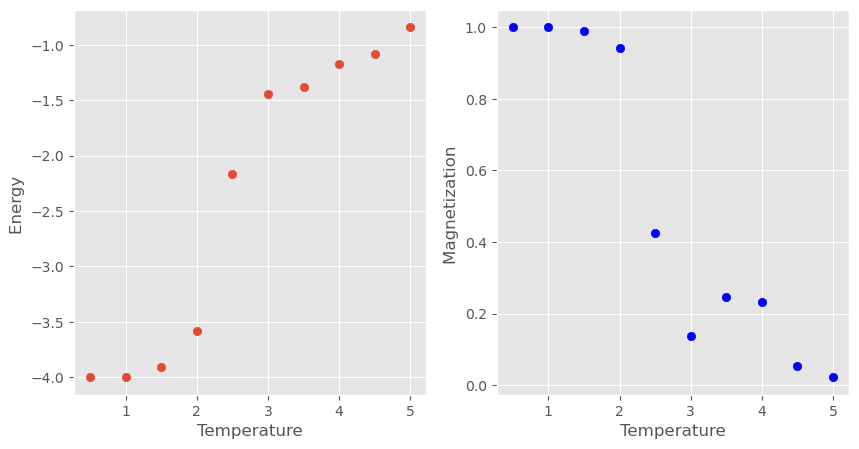

In [125]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Из графиков следует вывод, что с ростом температуры намагниченность уменьшается.
При повышении температуры возрастает роль теплового движения, что приводит к уменьшению намагниченности
фазовый переход упорядоченное-разупорядоченное происходит при температуре Кюри
выше этой тепературы ферромагнетик ведёт себя как парамагнетик (подчиняется закону Кюри-Вейса)
простешая модель описания энергии взаимодействия $- E_{int} = -A(N_{up}-N_{down})^2$, переход от ферромагнетика к парамагнетику происходит при равенстве среднего значения разности энок нулю, что происходит с ростом температуры

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

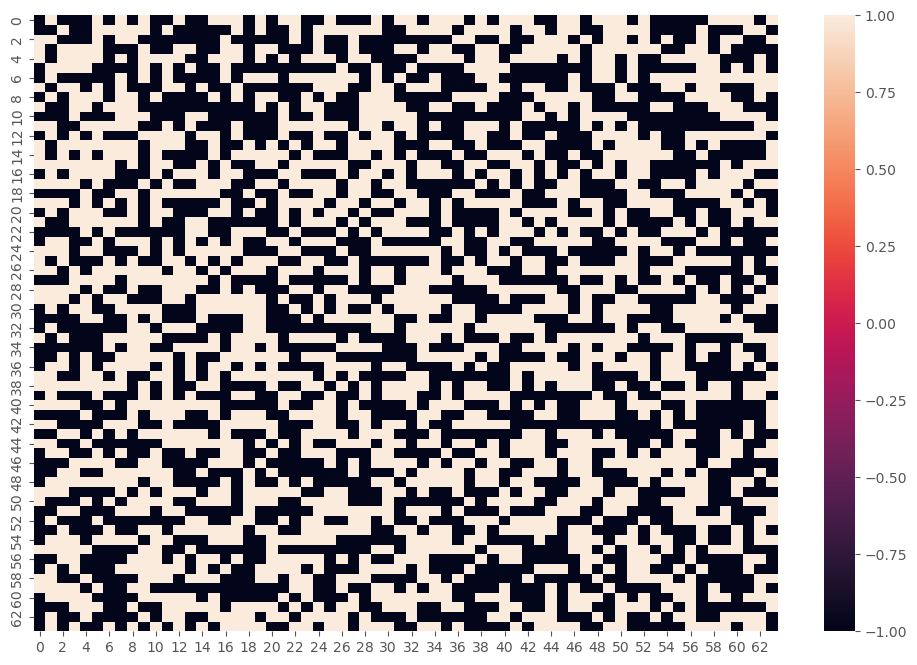

In [117]:
import seaborn as sns
N = 64
state = getInitialState(N)

plt.figure(figsize=(12, 8))
sns.heatmap(state)
plt.show()

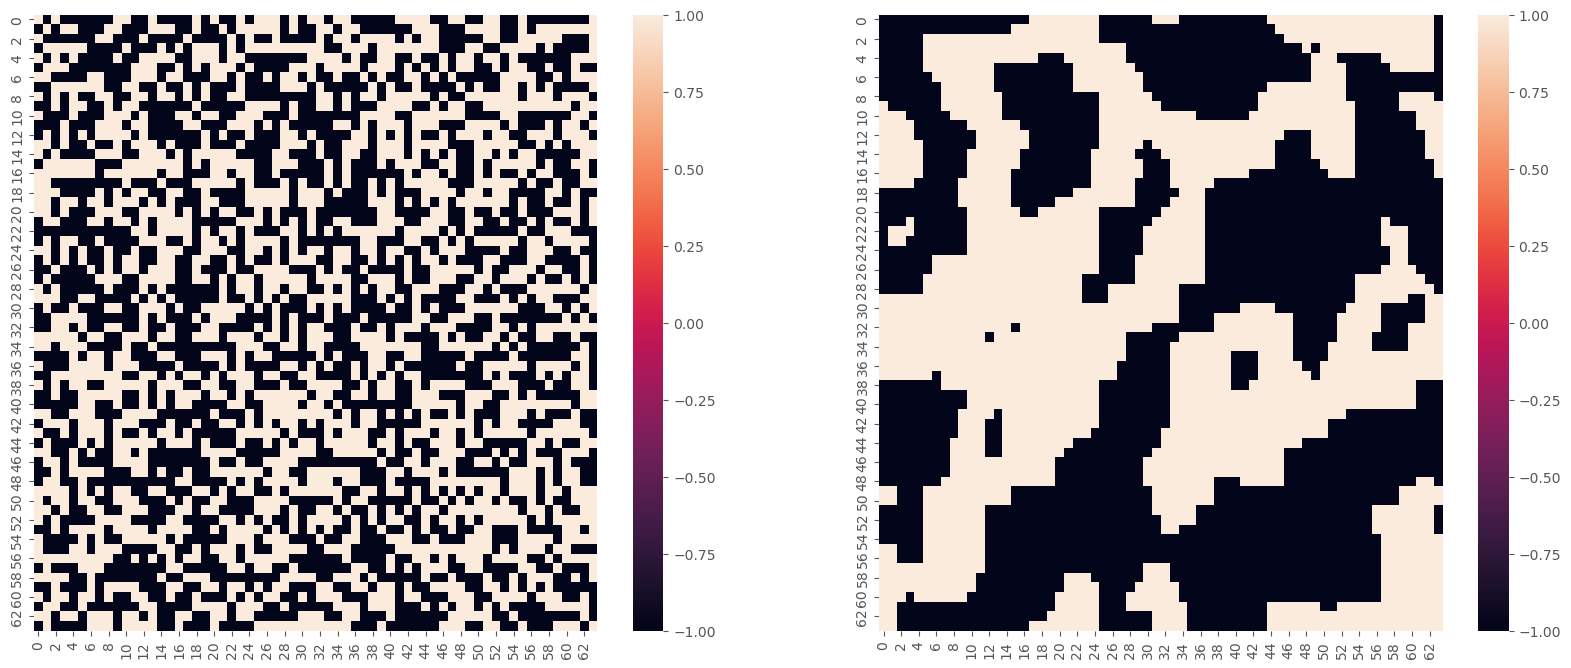

In [120]:
times = 10
stateHigh = getInitialState(N)
stateLow = getInitialState(N)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

for _ in range(times):
    stateLow = makeFlip(0.5, stateLow)
    stateHigh = makeFlip(20, stateHigh)
    
sns.heatmap(stateHigh, ax=ax[0])
sns.heatmap(stateLow, ax=ax[1])
plt.show()

На первом графике при высоких температурах магнетические свойства увеличиваются и появляются большие группы близко раположенных спинов. которые ориентированны одинаково. На втором высокие температуры - происходит обратное.